In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense
import matplotlib.pyplot as plt
import numpy as np

In [11]:
mnist = tf.keras.datasets.mnist;
(x_train_full,y_train_full),(x_test_full,y_test_full) = mnist.load_data()

In [12]:
x_train_full = x_train_full.astype('float32') / 255.0
x_test_full = x_test_full.astype('float32') / 255.0

In [13]:
x_train_full = x_train_full.reshape(-1,784)
x_test_full = x_test_full.reshape(-1,784)
len(x_test_full[0])

784

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


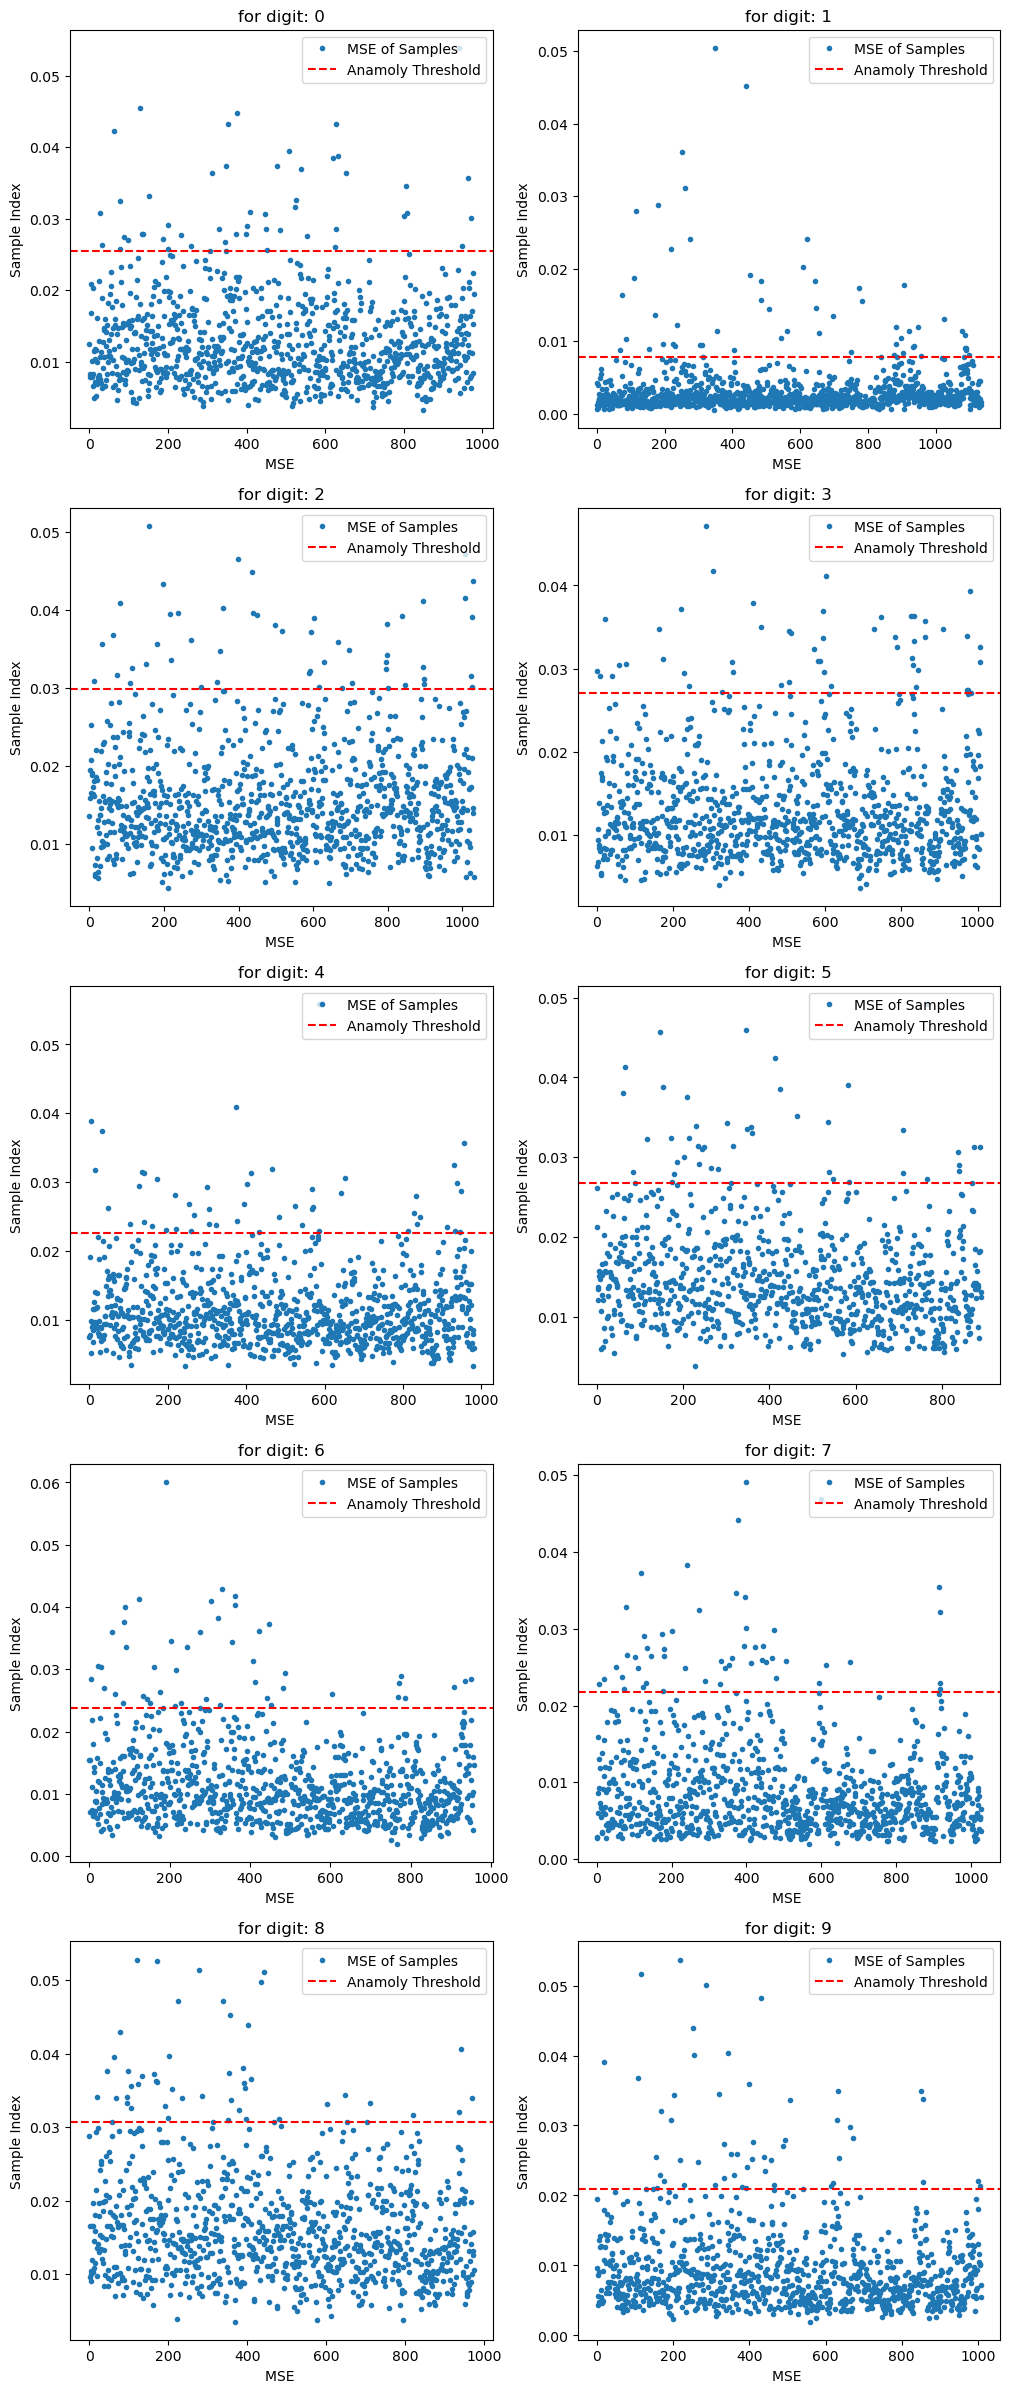

In [59]:
plt.figure(figsize=(12,30))
# plt.figure(figsize=(12, 6))
for i in range(10):
    x_train = x_train_full[y_train_full == i]
    x_test = x_test_full[y_test_full == i]
    input_shape = 784
    encoder = Sequential([
        Input(shape=(input_shape,)),
        Dense(128,activation="relu"),
        Dense(64,activation="relu"),
        Dense(32,activation="relu"),
    ])

    decoder = Sequential([
        Input(shape=(32,)),
        Dense(64,activation="relu"),
        Dense(128,activation="relu"),
        Dense(input_shape,activation="sigmoid")
    ])

    autoencoder = Sequential([encoder,decoder])
    autoencoder.compile(optimizer = "adam",loss="mean_squared_error",metrics=["accuracy"])
    history = autoencoder.fit(x_train,x_train,epochs=10,batch_size=32,shuffle=True,verbose=0)
    y_pred = autoencoder.predict(x_test)
    
    mse = np.mean(np.power(x_test - y_pred , 2 ) , axis = 1)
    threshold = np.percentile(mse,95)
    anomalies = mse > threshold
    plt.subplot(5,2,i+1)
    plt.plot(mse,marker=".",linestyle="")
    plt.xlabel("MSE ")
    plt.ylabel("Sample Index")
    plt.title(f"for digit: {i}")
    plt.axhline(threshold,color="r",linestyle="--")
    plt.legend(["MSE of Samples","Anamoly Threshold"],loc="upper right")

plt.show()